In [1]:
import sys
sys.path.append("../getData")
sys.path.append("../functions/")
sys.path.append("../../visualization")
import bdStocks
import graficosJupyterNotebook as graficos
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
exchange="MC"
indiceName="ibex35"
getsectors=True
getdescriptions=False
columnas=["netIncome","totalRevenue","stock"]
columnasPrecios=["Adjusted_close","stock"]
not_index=True

In [3]:

bd=bdStocks.getData()
precios=bd.getPrizesByExchange(exchange,columnas=columnasPrecios)
fundamentals=bd.getFundamentalsByExchange(exchange,bd=True,columnas=columnas)
indice=bd.getIndexPrizes(indiceName)
if getsectors:
    sectors=bd.getSectors(exchange)
    fundamentals["sector"]=fundamentals["stock"].transform(lambda t:sectors[t])
if   getdescriptions:
    descriptions=bd.getDescriptions(exchange)
    fundamentals["description"]=fundamentals["stock"].transform(lambda t:descriptions[t])
if not_index:
    precios.reset_index(inplace=True)
    fundamentals.reset_index(inplace=True)

Time: 03/07/2022, 21:09 Message: CSV access time to get prizes 3.235780715942383

Time: 03/07/2022, 21:09 Message: Object size (prizes data)63.467325 MB

Time: 03/07/2022, 21:09 Message: BD access time to get stock fundamentals 0.7142989635467529

Time: 03/07/2022, 21:09 Message: Object size (fundamental data)8.026913 MB

Time: 03/07/2022, 21:09 Message: BD access time to sectors 0.27025628089904785



In [4]:
stocks=np.unique(fundamentals["stock"])
sectors=np.unique(fundamentals["sector"])
dataframeAnalysis=fundamentals.loc[fundamentals["sector"].isin([sectors[-6]])]
dataframeAnalysis=dataframeAnalysis.merge(precios,how='right',on=["fecha","stock"])
stocksAnalysis=np.unique(dataframeAnalysis["stock"])
import itertools
import functools
numStocks=2
combinaciones=itertools.combinations(stocksAnalysis,2)

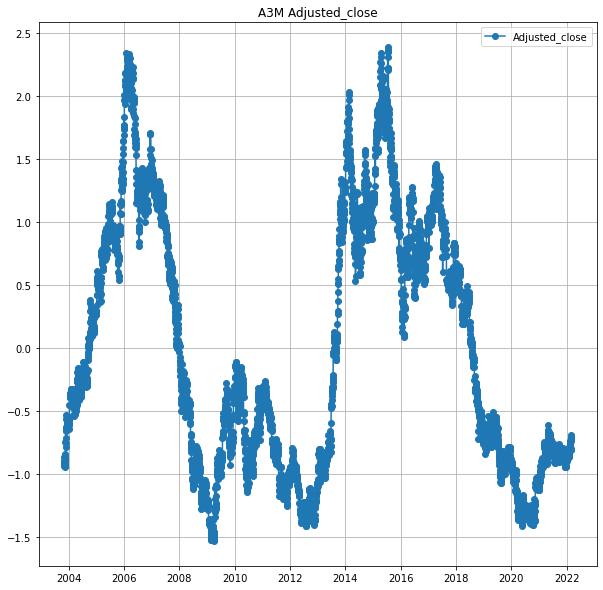

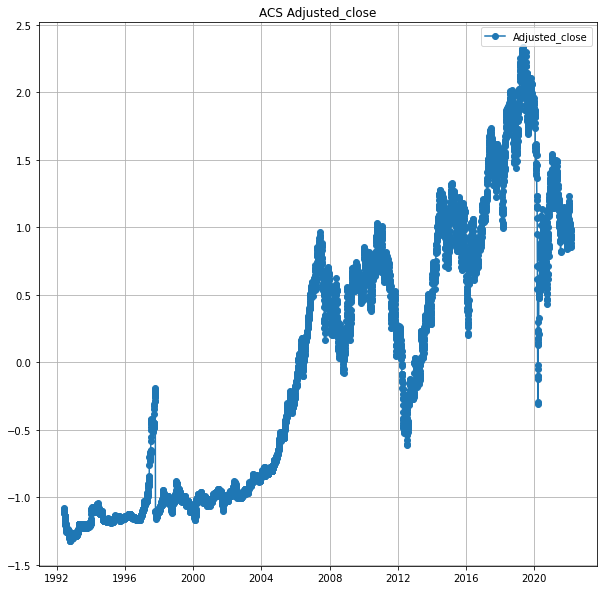

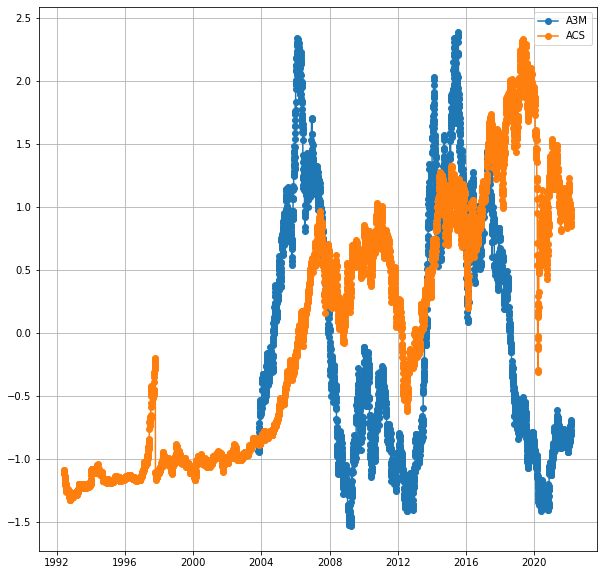

In [5]:
pareja=next(combinaciones)
array={e:dataframeAnalysis.loc[dataframeAnalysis["stock"]==e] for e in pareja}
for stock,data in array.items():
    data.set_index("fecha",inplace=True,drop=True)
    column="Adjusted_close"
    graficos.linearplot(data,stock+" "+column,True,column)
    column="netIncome"
    #graficos.linearplot(data,stock+" "+column,column)
graficos.linearplot_multiple_data("Adjusted_close",True,None,*list(array.values()))
    
#graficos.linearplot_multiple_data("netIncome",None,*list(array.values()))